In [1]:
%pylab inline
import csv
import os, os.path
import seaborn as sns
sns.set_context('talk')
import scipy.stats as sps

Populating the interactive namespace from numpy and matplotlib


### Loading a folder with matrices screening for sTa
Conditions:
Each file contains an unique sTa
The parameters for sTs and mTs are exactly the same among all repetitions.

In [21]:
def load_metadata(exp_key, prefix = './', print_meta = True):
    '''
    Loads the metadata, which contains all the parameters used for the simulation
    BE CAREFUL: The parameters are set as global variables!!
    If print_meta == True, it prints the values of the imported parameters
    '''
    
    infile =open(prefix+'iexp_'+exp_key+'_meta.csv', mode='r')
    reader = csv.reader(infile)
    meta = list(reader)
    infile.close()
    
    global mTa, sTa, tg, MTs_start, MTs_stop, MTs_step, STs_start, STs_stop, STs_step
    
    mTa = float(meta[0][1])
    sTa = float(meta[1][1])
    tg = float(meta[2][1])
    MTs_start = float(meta[3][1])
    MTs_stop = float(meta[4][1])
    MTs_step = float(meta[5][1])
    STs_start = float(meta[6][1])
    STs_stop = float(meta[7][1])
    STs_step = float(meta[8][1])
    if print_meta:
        print(meta)
    
    return meta

def get_keys(Fnames):
    EXP_KEY = ['']*len(Fnames)
    for i in range(len(Fnames)):
        EXP_KEY[i] = Fnames[i].split('_')[1]
    return EXP_KEY

## Load mutliple experiments

In [22]:
dir_load = './idata/iexp_9/'
meta = load_metadata('901', prefix=dir_load, print_meta=False)

# Get metadata file names in dir_load
F_meta = sorted([name for name in os.listdir(dir_load) if os.path.isfile(os.path.join(dir_load, name)) and name.endswith("csv")])
# Get matrix file names in dir_load
F_npy = sorted([name for name in os.listdir(dir_load) if os.path.isfile(os.path.join(dir_load, name)) and name.endswith("npy")])

# Create the metaMatrix :O using the metadata from the first file
EXP_KEY = get_keys(F_meta)
meta = load_metadata(EXP_KEY[0], prefix=dir_load, print_meta=False)
MTs = np.arange(MTs_start,MTs_stop,MTs_step)
STs = np.arange(STs_start,STs_stop,STs_step)

# metaMatrix
NNN = np.zeros((len(EXP_KEY), len(MTs), len(STs)))
# STa
STa = np.zeros(len(EXP_KEY))
# Here we assume the same mTa for all of them
for i in range(len(EXP_KEY)):
    meta = load_metadata(EXP_KEY[i], prefix=dir_load, print_meta=False)
    STa[i] = sTa
    NNN[i, :, :] = np.load(dir_load+F_npy[i])

## Load single experiment
Exp 001: Deterministic run

In [12]:
dir_load = './'
exp_key = '001'
meta = load_metadata(exp_key=exp_key, prefix=dir_load, print_meta=False)
MTs = np.arange(MTs_start,MTs_stop,MTs_step)
STs = np.arange(STs_start,STs_stop,STs_step)
NN = np.load(dir_load+'iexp_'+exp_key+".npy")

In [5]:
def plot_heatmap(MTs, STs, MN, mTa, MTs_step, exp_key = None):
    
    #Indices of E(T_s) values for max fitness as a function of std
    max_MTs_vs_std = np.argmax(MN, axis=0)
    #Indices of std(T_s) values for max fitness as a function of E(T_s)
    max_STs_vs_mean = np.argmax(MN, axis=1)

    plt.figure(figsize=(8,5))
    y_conv = np.arange(len(max_MTs_vs_std))
    plt.plot(max_MTs_vs_std+0.5, y_conv+0.5, '--')
    x_conv = np.arange(len(max_STs_vs_mean))
    plt.plot(x_conv+0.5, max_STs_vs_mean+0.5, '--')
    # ax = sns.heatmap(MN.T/n0, yticklabels=STs, xticklabels=MTs)
    ax = sns.heatmap(MN.T, yticklabels=False, xticklabels=False)
#     plt.locator_params(nbins = 5, tight=)
    plt.vlines(np.where(abs(MTs-mTa) <= MTs_step/2)[0][0]+0.5, 0,len(y_conv), color='r', linestyles='--')
    ax.invert_yaxis()
    plt.ylabel('Standard deviation')
    plt.xlabel('Mean lag time')
    plt.title('$t_a=$'+str(mTa))
    if exp_key:
        plt.savefig('./exp_'+exp_key+'_hmap.png')  

## Modify plot heatmap

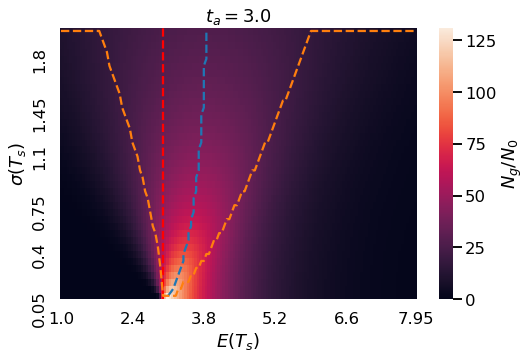

In [26]:
def plot_heatmap2(MTs, STs, MN, mTa, MTs_step, exp_key = None):

    
    STs_s = [None]*len(STs)
    n_ticks_s = 5
    STs_i = np.arange(len(STs))[0::len(STs)//n_ticks_s]
#     STs_i = np.append(STs_i, len(STs)-1)
    for i in STs_i:
        STs_s[i] = str(np.round(STs[i],2))

    MTs_s = [None]*len(MTs)
    n_ticks_m = 5
    MTs_i = np.arange(len(MTs))[0::len(MTs)//n_ticks_m]
    MTs_i = np.append(MTs_i, len(MTs)-1)
    for i in MTs_i:
        MTs_s[i] = str(np.round(MTs[i],2))
    
    #Indices of E(T_s) values for max fitness as a function of std
    max_MTs_vs_std = np.argmax(MN, axis=0)
    #Indices of std(T_s) values for max fitness as a function of E(T_s)
    max_STs_vs_mean = np.argmax(MN, axis=1)

    plt.figure(figsize=(8,5))
    y_conv = np.arange(len(max_MTs_vs_std))
    plt.plot(max_MTs_vs_std+0.5, y_conv+0.5, '--')
    x_conv = np.arange(len(max_STs_vs_mean))
    plt.plot(x_conv+0.5, max_STs_vs_mean+0.5, '--')
    ax = sns.heatmap(MN.T, yticklabels=STs_s, xticklabels=MTs_s, cbar_kws={'label': '$N_g/N_0$'},
                     cmap=None)#sns.cubehelix_palette(100, start=.5, rot=.75))
    # ax = sns.heatmap(MN.T, yticklabels=False, xticklabels=False)
    #     plt.locator_params(nbins = 5, tight=)
    plt.vlines(np.where(abs(MTs-mTa) <= MTs_step/2)[0][0]+0.5, 0,len(y_conv), color='r', linestyles='--')
    ax.invert_yaxis()
    ax.tick_params(bottom=False, left=False)
#     ax.locator_params(axis='y', nbins=6)
#     ax.locator_params(axis='x', nbins=10)
    plt.ylabel('$\sigma(T_s)$')
    plt.xlabel('$E(T_s)$')
    plt.title('$t_a=$'+str(mTa))
    # if exp_key:
    #     plt.savefig('./exp_'+exp_key+'_hmap.png')
    
plot_heatmap2(MTs, STs, NN, mTa, MTs_step)

### Heatmap 3

[38 38 38 38 38 38 38 38 38 36 35 34 33 31 30 29 28 26 25 24 22 21 19 18
 16 15 13 11  9  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  3  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38]
37
140
[]


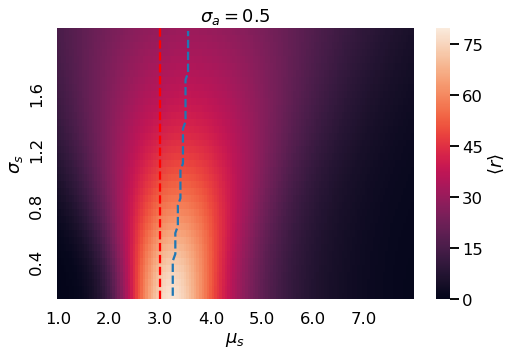

In [16]:
MTs_w = np.arange(1,8,1)
STs_w = np.arange(0.4, 2, 0.4)

def plot_heatmap3(MTs, STs, MN, mTa, MTs_step, exp_key = None):

    
    STs_s = [None]*len(STs)
    for i in range(len(STs_s)):
        if np.round(STs[i],2) in np.round(STs_w,2):
            STs_s[i] = str(np.round(STs[i],2))
    
    MTs_s = [None]*len(MTs)
    for i in range(len(MTs_s)):
        if np.round(MTs[i],2) in np.round(MTs_w,2):
            MTs_s[i] = str(np.round(MTs[i],2))
    
    #Indices of E(T_s) values for max fitness as a function of std
    max_MTs_vs_std = np.argmax(MN, axis=0)
    #Indices of std(T_s) values for max fitness as a function of E(T_s)
    max_STs_vs_mean = np.argmax(MN, axis=1)

    plt.figure(figsize=(8,5))
    y_conv = np.arange(len(max_MTs_vs_std))
    plt.plot(max_MTs_vs_std+0.5, y_conv+0.5, '--')
    x_conv = np.arange(len(max_STs_vs_mean))
#     plt.plot(x_conv+0.5, max_STs_vs_mean+0.5, '--')

    # 0.5
#     plt.plot(x_conv[7:95]+0.5, max_STs_vs_mean[7:95]+0.5, '--')

    # 0.75
#     plt.plot(x_conv[:90]+0.5, max_STs_vs_mean[:90]+0.5, '--')

    # 1.0
#     plt.plot(x_conv[:84]+0.5, max_STs_vs_mean[:84]+0.5, '--')
    # 1.5
#     plt.plot(x_conv[:73]+0.5, max_STs_vs_mean[:73]+0.5, '--')
    # det
#     plt.plot(x_conv[15:100]+0.5, max_STs_vs_mean[15:100]+0.5, '--')
    ####
    print(max_STs_vs_mean)
    print(len(STs)-1)
    dmax = max_STs_vs_mean[1:]-max_STs_vs_mean[:-1]
    print(len(max_STs_vs_mean))
    iii = np.where((max_STs_vs_mean[:-1] == len(STs)-1) & (dmax == 0))[0]
    
    print(iii)
    
#     ind_iii = np.where(iii_i != 1)[0]
#     print(ind_iii)
    ####
    
    ax = sns.heatmap(MN.T, yticklabels=STs_s, xticklabels=MTs_s, cbar_kws={'label': r'$\langle r\rangle$'},
                     cmap=None, vmin=0, vmax=80)#sns.cubehelix_palette(100, start=.5, rot=.75))
    # ax = sns.heatmap(MN.T, yticklabels=False, xticklabels=False)
    #     plt.locator_params(nbins = 5, tight=)
    plt.vlines(np.where(abs(MTs-mTa) <= MTs_step/2)[0][0]+0.5, 0,len(y_conv), color='r', linestyles='--')
    ax.invert_yaxis()
    ax.tick_params(bottom=False, left=False)
#     ax.locator_params(axis='y', nbins=6)
#     ax.locator_params(axis='x', nbins=10)
    plt.ylabel('$\sigma_s$')
    plt.xlabel('$\mu_s$')
#     plt.title('$t_a=$'+str(mTa))
    plt.title('$\sigma_a=0.5$')
    if exp_key:
        plt.savefig('./exp_'+exp_key+'_hmap.png', bbox_inches='tight', format = 'png')

plot_heatmap3(MTs, STs[1:], NNN[10,:,1:], mTa, MTs_step, 'BBB0p5')

[38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 37 36 35 33 32 31 30 29
 27 26 25 24 22 21 20 18 17 15 14 12 10  9  7  4  0  0  0  0  0  0  1  1
  2  2  2  3  3  4  4  5  5  6  6  7  8  8  9  9 10 11 11 12 13 13 14 15
 15 16 17 18 18 19 20 21 22 22 23 24 25 26 27 28 28 29 30 31 32 33 34 35
 36 37 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38]
37
140
[]


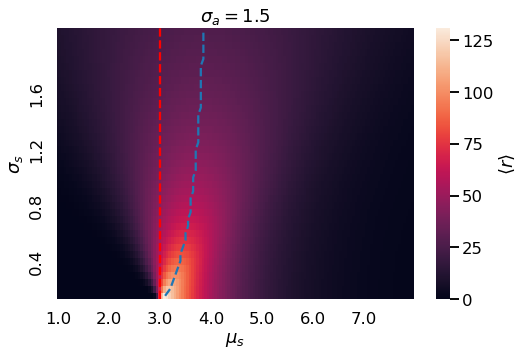

In [13]:
plot_heatmap3(MTs, STs[1:], NN, mTa, MTs_step, 'AAAdeterministic')

In [24]:
def get_max_of_max(MTs, STs, MN):
    '''
    Get the numbers associated with the values of parameters that yield the maximum fitness.
    '''

    max_col_ind = np.argmax(np.max(MN, axis = 1))
    max_row_ind = np.argmax(np.max(MN, axis = 0))
    
#     max_MTs_vs_std = np.argmax(MN, axis=0)
#     plt.plot(STs, MTs[max_MTs_vs_std], '-o', label = str(sTa))
    
    mean_max_fit = MTs[max_col_ind] # Mean lag time that yields max fitness
    std_max_fit = STs[max_row_ind] # Std of lag times that yields max fitness
    
    max_fit = MN[max_col_ind, max_row_ind] # Final population that yields max fitness
#     max_fit_var = np.sqrt(VN[max_col_ind, max_row_ind]) # Variance in final population that yields max fitness

    return mean_max_fit, std_max_fit, max_fit

def max_several_exp(NNN, MTs, STs, STa, tg):
    Mean_max_fit, Std_max_fit, Max_fit = np.zeros(len(STa)), np.zeros(len(STa)), np.zeros(len(STa))    
    for i in range(len(STa)):
        Mean_max_fit[i], Std_max_fit[i], Max_fit[i] = get_max_of_max(MTs, STs, NNN[i,:,:])
    return Mean_max_fit, Std_max_fit, Max_fit

In [25]:
def plot_max_lines(MTs, STs, MN, mTa, exp_key = None):
    #Indices of E(T_s) values for max fitness as a function of std
    max_MTs_vs_std = np.argmax(MN, axis=0)
    #Indices of std(T_s) values for max fitness as a function of E(T_s)
    max_STs_vs_mean = np.argmax(MN, axis=1)
    
    fig, axs = plt.subplots(1,2, figsize=(7,3.5), tight_layout=True)

    MTs_star = MTs[max_MTs_vs_std]
    
    axs[0].plot(STs, MTs_star, 'o-')
    axs[0].set_xlabel('$\sigma(T_s)$')
    axs[0].set_ylabel('$E(T_s)$ for max. fitness')

    axs[1].plot(MTs, [STs[e] for e in max_STs_vs_mean], 'o-')
    axs[1].set_xlabel('$E(T_s)$')
    axs[1].set_ylabel('$\sigma(T_s)$ for max. fitness')
    
    if exp_key:
        plt.savefig('./exp_'+exp_key+'_maxs.png')
    return MTs_star

### Plot max lines single heatmap multiple experiments

/home/gutiloluis/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


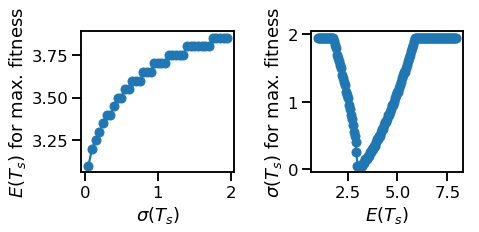

In [40]:
MTs_star = plot_max_lines(MTs, STs, NN, mTa, exp_key = None)

/home/gutiloluis/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


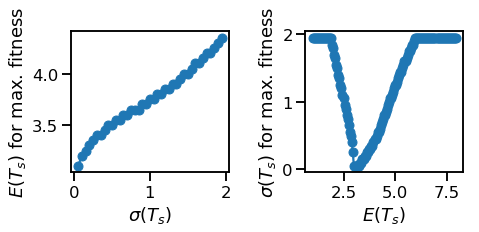

In [42]:
MTs_star5 = plot_max_lines(MTs, STs, NN, mTa, exp_key = None)

/home/gutiloluis/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


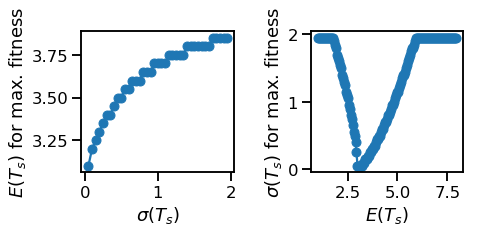

In [46]:
MTs_star11 = plot_max_lines(MTs, STs, NN, mTa, exp_key = None)

/home/gutiloluis/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


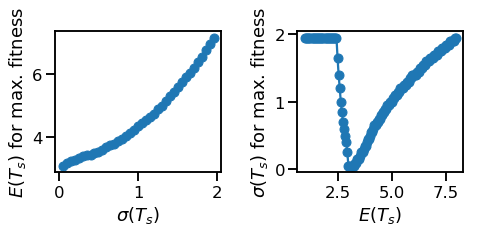

In [50]:
MTs_star4 = plot_max_lines(MTs, STs, NN, mTa, exp_key = None)

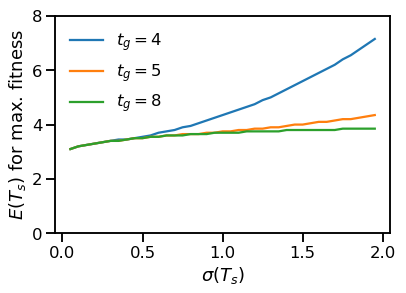

In [64]:
plt.plot(STs, MTs_star4, label='$t_g = 4$')
plt.plot(STs, MTs_star5, label='$t_g = 5$')
plt.plot(STs, MTs_star, label='$t_g = 8$')
plt.xlabel('$\sigma(T_s)$')
plt.ylabel('$E(T_s)$ for max. fitness')
plt.ylim([0,8])
plt.legend(frameon = False)
# plt.plot(STs, MTs_star11, 'o')
plt.savefig('det_screen_tg.png',  bbox_inches='tight')

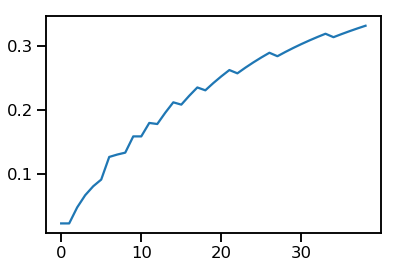

In [35]:
# Find cdf at the cut for the different values
cdfss = np.zeros(len(STs))
for i in range(len(STs)):
    cdfss[i] = sps.norm.cdf(3,loc = MTs_star[i], scale=STs[i])

plt.plot(cdfss)

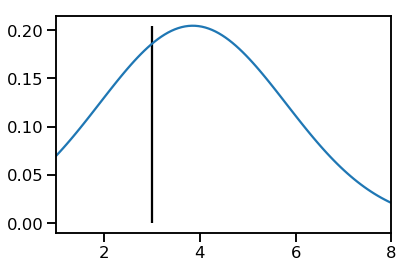

In [38]:
X = np.linspace(1,8,100)
i = 10

for i in range(1):
    i = len(STs)-1
    mtss = MTs_star[i]
    stss = STs[i]
    Y = sps.norm.pdf(X, loc = mtss, scale = stss)
    plt.figure()
    plt.plot(X,Y)
    plt.vlines(3,0,max(Y))
    plt.xlim([1,8])

Text(0, 0.5, 'Max. fitness')

/home/gutiloluis/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


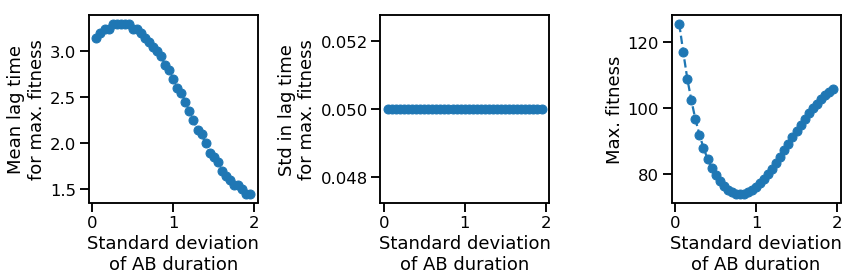

In [28]:
Mean_max_fit, Std_max_fit, Max_fit = max_several_exp(NNN[:,:,1:], MTs, STs[1:], STa, tg)
fig, ax = plt.subplots(1, 3, figsize=(12,4),tight_layout=True)
ax[0].plot(STa, Mean_max_fit, 'o--')
ax[0].set_xlabel('Standard deviation\nof AB duration')
ax[0].set_ylabel('Mean lag time\nfor max. fitness')

ax[1].plot(STa, Std_max_fit, 'o--')
ax[1].set_xlabel('Standard deviation\nof AB duration')
ax[1].set_ylabel('Std in lag time\nfor max. fitness')

ax[2].plot(STa, Max_fit, 'o--')
ax[2].set_xlabel('Standard deviation\nof AB duration')
ax[2].set_ylabel('Max. fitness')

In [100]:
min_sTs_ind = 1

In [26]:
Mean_max_fit, Std_max_fit, Max_fit = max_several_exp(NNN[:,:,min_sTs_ind:], MTs, STs[min_sTs_ind:], STa, tg)
fig, ax = plt.subplots(1, 3, figsize=(12,4),tight_layout=True)
ax[0].plot(STa, Mean_max_fit, 'o--')
ax[0].set_xlabel('Standard deviation\nof AB duration')
ax[0].set_ylabel('Mean lag time\nfor max. fitness')
ax[0].set_ylim([0,3.5])

ax[1].plot(STa, Std_max_fit, 'o--')
ax[1].set_xlabel('Standard deviation\nof AB duration')
ax[1].set_ylabel('Std in lag time\nfor max. fitness')

ax[2].plot(STa, Max_fit, 'o--')
ax[2].set_xlabel('Standard deviation\nof AB duration')
ax[2].set_ylabel('Max. fitness')

plt.savefig('sum_stoch.png', bbox_inches='tight')

NameError: name 'min_sTs_ind' is not defined

NameError: name 'Mean_max_fit' is not defined

/home/gutiloluis/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


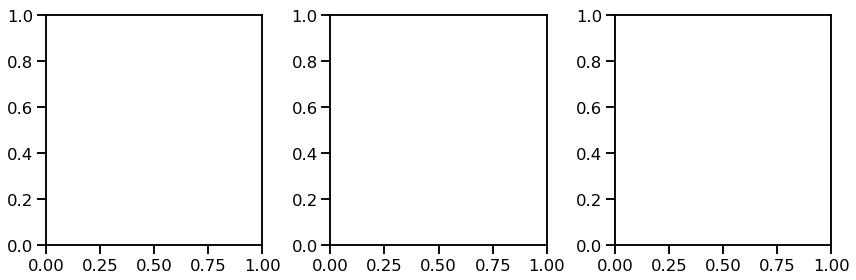

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(12,4),tight_layout=True)
ax[0].plot(STa, Mean_max_fit, 'o--')
ax[0].set_xlabel('Standard deviation\nof AB duration')
ax[0].set_ylabel('Mean lag time\nfor max. fitness')

ax[1].plot(STa, Std_max_fit, 'o--')
ax[1].set_xlabel('Standard deviation\nof AB duration')
ax[1].set_ylabel('Std in lag time\nfor max. fitness')

ax[2].plot(STa, Max_fit, 'o--')
ax[2].set_xlabel('Standard deviation\nof AB duration')
ax[2].set_ylabel('Max. fitness')

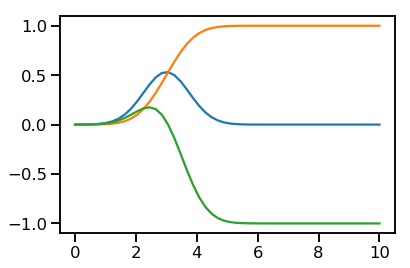

In [9]:
scale = 0.75
loc = 3
aa = sps.norm(loc=loc, scale=scale)
x = np.linspace(0,10,50)
yp = aa.pdf(x)
yc = aa.cdf(x)
plt.plot(x,yp)
plt.plot(x,yc)

def dipc(x, loc, scale):
    aa = sps.norm(loc=loc, scale=scale)
    return aa.pdf(x) - aa.cdf(x)

plt.plot(x,dipc(x,loc,scale))

In [7]:
# find zeros
import scipy.optimize as spo

In [18]:
scales = np.arange(0.05, 2, 0.05)
Rs = np.zeros(len(scales))
for i in range(len(Rs)):
    Rs[i] = spo.bisect(dipc, 0,8, args=(loc, scales[i]))

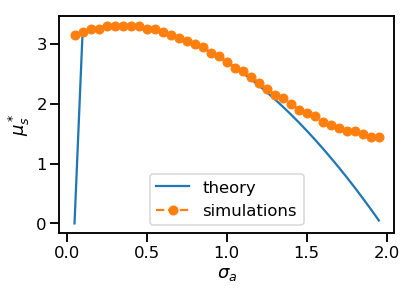

In [35]:
plt.plot(scales, Rs, label = 'theory')
plt.plot(STa, Mean_max_fit, 'o--', label = 'simulations')
plt.xlabel("$\sigma_a$")
plt.ylabel("$\mu_s^*$")
plt.legend()